
<h2 align = center>Data Modeling and Fitting with Imported Data</h2>
<h3 align=center>(Univariate Linear Regression with SciKitLearn)</h3>

<h3 align=center>Ben Bland</h3>

<h3>Importing modules and loading the 'brain' dataset</h3>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h3>Looking at the last five entries of the dataset...</h3>

In [10]:
df = pd.read_csv('dataset_brain.txt',
                encoding = 'utf-8',
                comment='#',
                sep = '\s+')
df.tail()


,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


<h2> Examining data for statistical correlations of features</h2>

In [11]:
df.corr()

,gender,age-group,head-size,brain-weight
gender,1.000000,-0.088652,-0.514050,-0.465266
age-group,-0.088652,1.000000,-0.105428,-0.169438
head-size,-0.514050,-0.105428,1.000000,0.799570
brain-weight,-0.465266,-0.169438,0.799570,1.000000


<h2> Plot the data that shows <i>high</i> correlation (head-size & brain-weight at ~80% correlation)</h2>

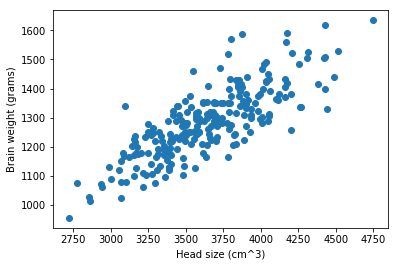

In [12]:
#Using matplotlib.pyplot to create a scatter plot with head size on the X-axis and brain weight on the Y-axis
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');


<h2>Preparing the dataset for model building</h2>

In [13]:
y = df['brain-weight'].values
y.shape

(237,)

<h2>SciKitLearn and Numpy expect the data to be 2 dimensional so we will need to add an axis</h2>
The newaxis object can be used in all slicing operations to create an axis of length one. Each newaxis object in the selection tuple serves to expand the dimensions of the resulting selection by one unit-length dimension. newaxis is an alias for ‘None’, and ‘None’ can be used in place of this with the same result.

In [14]:
X = df['head-size'].values
X=X.reshape(237,1)
#X = X[:, np.newaxis] 
#This command (used often) would do the same as above.
X.shape

(237, 1)

## ASIDE
<h3 style="color:green">Re-sizing NumPy Arrays</h3>

In [15]:
import numpy as np
#create 2 dimensional array (1 row and 3 columns)
A = np.array([1,2,3])
C = np.array([4,5,6])
print("The shape of the array A is {0} and of array C is {1}: ".format(A.shape, C.shape))
print("Now add a dimension to both arrays using two different methods")
B = A[:,np.newaxis]
D = C.reshape(3,1)
print("Now the shape of the array B is {0} and of array D is {1}: ".format(B.shape, D.shape))

The shape of the array A is (3,) and of array C is (3,): 
Now add a dimension to both arrays using two different methods
Now the shape of the array B is (3, 1) and of array D is (3, 1): 


<h2>Train/Test Split of Data</h2>

Scikit learn contains a function called the train_test_split function that will randomly shuffle the dataset and then splits it into two datasets: a training set used to build the model and a test set to assess and evaluate how well the model works on unseen data (also called out-ofsample data). The train_test_split function by default does a 75%/25% train/test split but the split can be modified by tuning the parameters of the function as indicated below in the code.

<h3>So, we need to split the dataset into training and testing sets. To do this we <i>import</i> the train_test_split method from scikitlearn.</h3>

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

What did this accomplish?
* Model can be trained and tested on <b>different data</b>
* Response values (y) are known for the testing set (X), and thus <b>predictions can be evaluated</b>
* <b>Testing accuracy</b> is a better estimate than training accuracy of out-of-sample performance


<h3>To get a good visual representation of our data after splitting it, lets plot the data</h3>

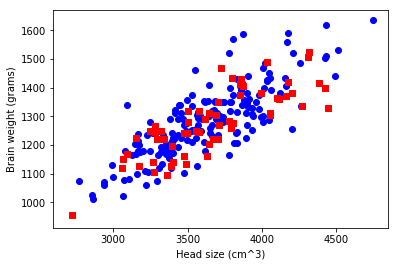

In [17]:
plt.scatter(X_train, y_train, c='blue', marker = 'o')
plt.scatter(X_test, y_test, c='red', marker = 's')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

The data shows a trend that indicates the brain weight rate increases as we move to larger head sizes. Let's now use the raw data to:

1. Find a best fit for the data
2. Creating a model from the best fit parameters
3. Testing the model predictive capability with new data
4. Evaluating the model's performance

<h2>Fitting the Linear Regression model to the dataset</h2>

In [18]:
from sklearn.linear_model import LinearRegression
#instantiate the class (object)
lr = LinearRegression()
#call the fit method
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#Let's generate the predictions (an array) based on our test data as input
y_pred = lr.predict(X_test)

<h2>Evaluating the model</h2>

Let's use definitions to evaluate the goodness of the fit. Let's just <b>brute force</b> it with code...

In [20]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: {0: .3f}'.format (r2_score))

R2 score:  0.612


Compare the <b>brute force</b> evaluation method to the <b>built-in</b> scoring method.

In [21]:
print('R2 score: {0:.3f}'.format(lr.score(X_test, y_test)))

R2 score: 0.612


<b><i>The regression coefficients (returned from fit) are:</b></i>

In [22]:
#the slope
slope=lr.coef_
slope

array([ 0.27465969])

In [23]:
#the intercept
intercept= lr.intercept_
intercept


289.28217104676912

<h2>Now that we have the best fit parameters, let's create a <i>predictive model!</i> First let's plot our model using these parameters. We use our model to generate data to be plotted from our training set.</h1>

In [24]:
#let's generate a line from the fitted data.
y_fit = slope*X_train + intercept

<h3>Now let's plot our raw data and the line from our fitted data...</h3>

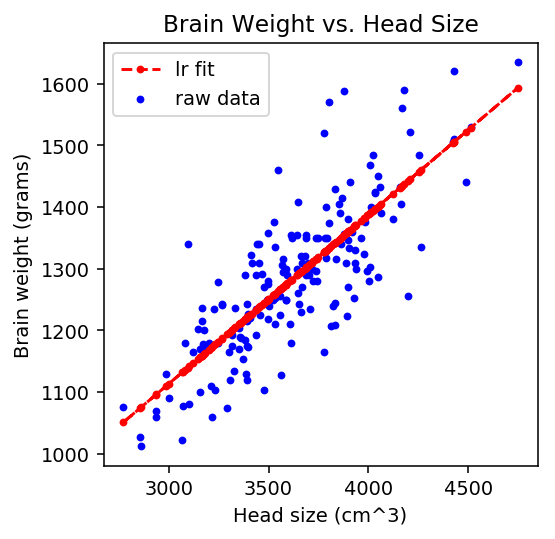

In [25]:
#define plot size in inches (width, height) & resolution (DPI)
fig = plt.figure(figsize=(4,4), dpi=140)
plt.scatter(X_train, y_train, c='blue', marker='.', label='raw data')
plt.plot(X_train,y_fit,linestyle="dashed",marker='.',color='red',label='lr fit')
plt.plot()
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');
#legend
plt.legend(loc='upper left')

#title
plt.title('Brain Weight vs. Head Size')
#show plot
plt.show()

<h3 style="color:blue">Summary: The Model and Predictions</h3>

From this output, we have determined that the intercept is 289.3 and the regression coefficient for the brain_weight is 0.245. Therefore, the complete regression equation is:

<b>Brain_Weight = 0.245*Head_Size + 289.3</b>

This equation tells us that the <b>predicted brain weight</b> for people <b>will increase by 0.245 grams for every one cubic centimeter increase in head size.</b>

We must take care in using this model for predictions since it has a <b>poor fit</b> to the data with an R-Squared (coefficient of determination) value of 0.612 meaning an <b>accuracy of only ~61%.</b>